# Vchu Homework 11
Step 3- Climate Analysis and Exploration

In [67]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy import create_engine

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from sqlalchemy import Column, Integer, String, Float

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import extract
from sqlalchemy import func, text
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import seaborn as sns
#Date of Vacation: July15-26

In [68]:
engine=create_engine("sqlite:///hawaii.sqlite")

In [69]:
Base=automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['Measurement', 'Stations']

In [70]:
session=Session(engine)

In [71]:
Measurement = Base.classes.Measurement
Stations= Base.classes.Stations

In [72]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [73]:
first_row=session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19f00352fd0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [74]:
first_rowstation=session.query(Stations).first()
first_rowstation.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19f00389828>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Precipitation Analysis

In [111]:
measurement_results=session.query(Measurement.date, Measurement.prcp
                                 ).filter(Measurement.date >= '2012-01-01').all()

In [112]:
measurement_date=[result[0] for result in measurement_results]
measurement_prcp=[result[1] for result in measurement_results]
measurement_prcp

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.03,
 1.03,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.37,
 0.28,
 0.01,
 0.0,
 0.0,
 0.0,
 0.04,
 0.01,
 0.0,
 0.0,
 0.0,
 0.04,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.06,
 0.0,
 0.0,
 0.06,
 0.0,
 0.03,
 0.01,
 1.08,
 4.0,
 2.42,
 0.02,
 0.19,
 0.06,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.0,
 0.11,
 0.03,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.19,
 0.0,
 0.03,
 0.0,
 0.07,
 0.05,
 0.06,
 0.0,
 0.03,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.04,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.02,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 None,
 0.0,

In [113]:
measurement_df=pd.DataFrame(measurement_results, columns=['measurement_date', 'measurement_prcp'])
measurement_df.set_index('measurement_date', inplace=True)
measurement_plot=measurement_df.reset_index()
measurement_df.head()

,measurement_prcp
measurement_date,
2012-01-01,0.0
2012-01-02,0.0
2012-01-03,0.0
2012-01-04,0.0
2012-01-06,0.0


Text(0.5,1,'Precipitation for the last 12 months')

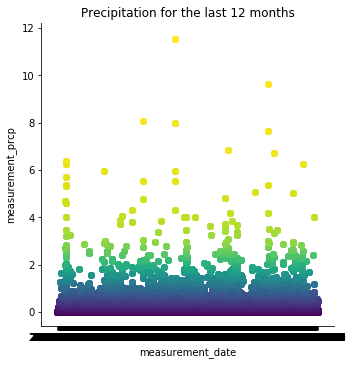

In [114]:
sns.lmplot(x="measurement_date",
           y="measurement_prcp",
           data=measurement_plot,
           palette="viridis",
           hue="measurement_prcp",
           legend=False,
           fit_reg=False,
           )
plt.title("Precipitation for the last 12 months")

In [115]:
measurement_plot.describe()

,measurement_prcp
count,64285.000000
mean,0.164639
std,0.475867
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Station Analysis

In [116]:
station_count = session.query(Stations.station).group_by(Stations.station).count()
station_count

9

In [117]:
station_results = session.query(Measurement.station, func.count(
   Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_results
#USC00519281 has highest number of observations

[('USC00519281', 13860),
 ('USC00519397', 13542),
 ('USC00513117', 13519),
 ('USC00519523', 13151),
 ('USC00516128', 12804),
 ('USC00514830', 10480),
 ('USC00511918', 9801),
 ('USC00517948', 5482),
 ('USC00518838', 2217)]

In [118]:
measurement_observations=session.query(Measurement.tobs
                                      ).filter(Measurement.date >= '2012-01-01').filter(Measurement.station == "USC00519281").group_by(Measurement.tobs).all()
measurement_observations

[(54),
 (56),
 (57),
 (58),
 (59),
 (60),
 (61),
 (62),
 (63),
 (64),
 (65),
 (66),
 (67),
 (68),
 (69),
 (70),
 (71),
 (72),
 (73),
 (74),
 (75),
 (76),
 (77),
 (78),
 (79),
 (80),
 (81),
 (82),
 (83),
 (84),
 (85)]

In [119]:
observation_tobs=[result[0] for result in measurement_observations]

In [120]:
observation_plot=pd.DataFrame(measurement_observations, columns=['observation tobs'])
observation_plot

,observation tobs
0,54
1,56
2,57
3,58
4,59
5,60
6,61
7,62
8,63
9,64


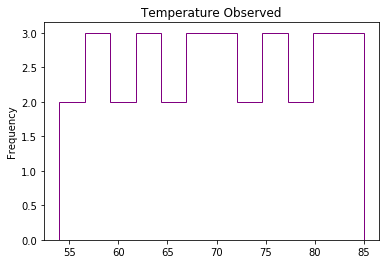

In [139]:
x=pd.Series(observation_plot["observation tobs"], name="Temperature observed")
plt.hist(x, bins=12, color="purple", histtype="step")
plt.title("Temperature Observed")
plt.ylabel("Frequency")
plt.ylim=(1,10)
plt.xlim=(50,90)
plt.show()
#observation_frequency=pd.cut(observation_plot["observation_frequency"], bins, labels=group_name)
#observation_frequency

# Temperature Analysis

In [132]:
#import datetime as dt
#calc_temps = dt.datetime(2017,7,9)
def calc_temp (start_date, end_date):
    querytemp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)
                                      ).filter(Measurement.date.between(start_date, end_date)).all()
    return querytemp

In [133]:
hawaii_vacationdate=calc_temp('2017-07-15','2017-07-25')

In [134]:
min_temp=[result[0] for result in hawaii_vacationdate]
max_temp=[result[1] for result in hawaii_vacationdate]
avg_temp=[result[2] for result in hawaii_vacationdate]
min_temp

[72]

In [135]:
temp_df=pd.DataFrame(hawaii_vacationdate, columns=['min_temp', 'max_temp', 'avg_temp'])
temp_plt=temp_df.reset_index()
temp_plt

,index,min_temp,max_temp,avg_temp
0,0,72,83,78.577259


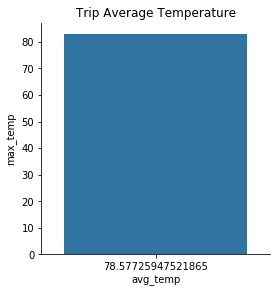

In [136]:

sns.factorplot(x='avg_temp', y='max_temp', data=temp_plt, ci=11, kind="bar")
plt.title("Trip Average Temperature")
plt.show()

# Climate App

In [143]:
from flask import Flask, jsonify
app= Flask(__name__)

In [158]:
def measurements():
    results = session.query(Measurement.date, Measurement.tobs).all()
    all_measurements= []
    for measurement in results:
            measurement_dict={}
            measurement_dict["date"]=Measurement.date
            measurement_dict["tobs"]=Measurement.tobs
            all_measurements.append(measurement_dict)
    return jsonify(all_measurements)


 * Restarting with stat


SystemExit: 1

C:\Users\vmchu\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#@app.route("/api/v1.0/stations")
#def stations():
#    results=session.query(Stations.station).all()
#    all_stations=list(np.ravel(results))
#    return jsonify(all_stations)

#@app.route("/api/v1.0/tobs")
#def temperatures():
#    results=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2017-04-08').all()
#    all_temperatures=list(np.ravel(results))
#    return jsonify(all_temperatures)

#@app.route("/api/v1.0/2017-07-15/2017-07-25")
#def calc_temp():
#    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)
#                                      ).filter(Measurement.date.between('2017-07-15','2017-07-25')).all()
#    vacation_temps = list(np.ravel(results))
#    return jsonify(vacation_temps)

#@app.route("/api/v1.0/2017-07-15")
#def start_temp():
#    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)
#                                      ).filter(Measurement.date >='2017-07-15').all()
#    vacation_start = list(np.ravel(results))
#    return jsonify(vacation_start)


In [156]:
if __name__ == '__main__':
    app.run(debug=True)

 * Restarting with stat


SystemExit: 1

C:\Users\vmchu\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
